<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.062664,49.791428,75.026875,62.988374,0.000461,292.869802,292.860847,0.008956
1,0.0,1.0,77.951836,32.474946,71.094698,89.038885,-0.035115,280.525250,280.558335,-0.033085
2,0.0,2.0,47.378982,88.149532,21.138105,63.263285,0.012711,229.942615,229.940080,0.002535
3,0.0,3.0,99.329566,20.947738,95.886857,21.263353,-0.038751,247.388762,247.414942,-0.026180
4,0.0,4.0,46.498660,75.434417,93.806735,21.943354,-0.014924,247.668242,247.675381,-0.007140
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,47.958201,69.775337,70.566158,92.452335,-0.013577,290.738454,290.753620,-0.015166
59996,999.0,56.0,33.123624,59.482907,90.898888,49.030748,-0.020105,242.516062,242.544562,-0.028500
59997,999.0,57.0,74.515872,68.525925,43.995959,83.935099,-0.004686,280.968169,280.967610,0.000559
59998,999.0,58.0,94.270749,47.712775,75.433415,31.743999,-0.000199,259.160738,259.160906,-0.000169


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.062664,49.791428,75.026875,62.988374,0.000461,292.869802,292.860847,0.008956
1,0.0,1.0,77.951836,32.474946,71.094698,89.038885,-0.035115,280.525250,280.558335,-0.033085
2,0.0,2.0,47.378982,88.149532,21.138105,63.263285,0.012711,229.942615,229.940080,0.002535
3,0.0,3.0,99.329566,20.947738,95.886857,21.263353,-0.038751,247.388762,247.414942,-0.026180
4,0.0,4.0,46.498660,75.434417,93.806735,21.943354,-0.014924,247.668242,247.675381,-0.007140
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,47.958201,69.775337,70.566158,92.452335,-0.013577,290.738454,290.753620,-0.015166
59996,999.0,56.0,33.123624,59.482907,90.898888,49.030748,-0.020105,242.516062,242.544562,-0.028500
59997,999.0,57.0,74.515872,68.525925,43.995959,83.935099,-0.004686,280.968169,280.967610,0.000559
59998,999.0,58.0,94.270749,47.712775,75.433415,31.743999,-0.000199,259.160738,259.160906,-0.000169


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.062664  49.791428  75.026875  62.988374  0.000461  292.869802   
      1.0    77.951836  32.474946  71.094698  89.038885 -0.035115  280.525250   
      2.0    47.378982  88.149532  21.138105  63.263285  0.012711  229.942615   
      3.0    99.329566  20.947738  95.886857  21.263353 -0.038751  247.388762   
      4.0    46.498660  75.434417  93.806735  21.943354 -0.014924  247.668242   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   47.958201  69.775337  70.566158  92.452335 -0.013577  290.738454   
      56.0   33.123624  59.482907  90.898888  49.030748 -0.020105  242.516062   
      57.0   74.515872  68.525925  43.995959  83.935099 -0.004686  280.968169   
      58.0   94.270749  47.712775  75.433415  31.743999 -0.000199  259.160738   
      59.0   90.010156  65.244597  46.962992  62.796936  0.024346  275.039026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    292.860847  0.008956  
      1.0    280.558335 -0.033085  
      2.0    229.940080  0.002535  
      3.0    247.414942 -0.026180  
      4.0    247.675381 -0.007140  
...                 ...       ...  
999.0 55.0   290.753620 -0.015166  
      56.0   242.544562 -0.028500  
      57.0   280.967610  0.000559  
      58.0   259.160906 -0.000169  
      59.0   275.008252  0.030774  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.062664  49.791428  75.026875  62.988374  0.000461  292.869802   
      1.0    77.951836  32.474946  71.094698  89.038885 -0.035115  280.525250   
      2.0    47.378982  88.149532  21.138105  63.263285  0.012711  229.942615   
      3.0    99.329566  20.947738  95.886857  21.263353 -0.038751  247.388762   
      4.0    46.498660  75.434417  93.806735  21.943354 -0.014924  247.668242   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   47.958201  69.775337  70.566158  92.452335 -0.013577  290.738454   
      56.0   33.123624  59.482907  90.898888  49.030748 -0.020105  242.516062   
      57.0   74.515872  68.525925  43.995959  83.935099 -0.004686  280.968169   
      58.0   94.270749  47.712775  75.433415  31.743999 -0.000199  259.160738   
      59.0   90.010156  65.244597  46.962992  62.796936  0.024346  275.039026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    292.860847  0.008956  
      1.0    280.558335 -0.033085  
      2.0    229.940080  0.002535  
      3.0    247.414942 -0.026180  
      4.0    247.675381 -0.007140  
...                 ...       ...  
999.0 55.0   290.753620 -0.015166  
      56.0   242.544562 -0.028500  
      57.0   280.967610  0.000559  
      58.0   259.160906 -0.000169  
      59.0   275.008252  0.030774  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.062664,49.791428,75.026875,62.988374,0.000461,292.869802,292.860847,0.008956
1,0.0,1.0,77.951836,32.474946,71.094698,89.038885,-0.035115,280.525250,280.558335,-0.033085
2,0.0,2.0,47.378982,88.149532,21.138105,63.263285,0.012711,229.942615,229.940080,0.002535
3,0.0,3.0,99.329566,20.947738,95.886857,21.263353,-0.038751,247.388762,247.414942,-0.026180
4,0.0,4.0,46.498660,75.434417,93.806735,21.943354,-0.014924,247.668242,247.675381,-0.007140
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,47.958201,69.775337,70.566158,92.452335,-0.013577,290.738454,290.753620,-0.015166
59996,999.0,56.0,33.123624,59.482907,90.898888,49.030748,-0.020105,242.516062,242.544562,-0.028500
59997,999.0,57.0,74.515872,68.525925,43.995959,83.935099,-0.004686,280.968169,280.967610,0.000559
59998,999.0,58.0,94.270749,47.712775,75.433415,31.743999,-0.000199,259.160738,259.160906,-0.000169


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.062664  49.791428  75.026875  62.988374  0.000461  292.869802   
      1.0    77.951836  32.474946  71.094698  89.038885 -0.035115  280.525250   
      2.0    47.378982  88.149532  21.138105  63.263285  0.012711  229.942615   
      3.0    99.329566  20.947738  95.886857  21.263353 -0.038751  247.388762   
      4.0    46.498660  75.434417  93.806735  21.943354 -0.014924  247.668242   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   47.958201  69.775337  70.566158  92.452335 -0.013577  290.738454   
      56.0   33.123624  59.482907  90.898888  49.030748 -0.020105  242.516062   
      57.0   74.515872  68.525925  43.995959  83.935099 -0.004686  280.968169   
      58.0   94.270749  47.712775  75.433415  31.743999 -0.000199  259.160738   
      59.0   90.010156  65.244597  46.962992  62.796936  0.024346  275.039026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    292.860847  0.008956  
      1.0    280.558335 -0.033085  
      2.0    229.940080  0.002535  
      3.0    247.414942 -0.026180  
      4.0    247.675381 -0.007140  
...                 ...       ...  
999.0 55.0   290.753620 -0.015166  
      56.0   242.544562 -0.028500  
      57.0   280.967610  0.000559  
      58.0   259.160906 -0.000169  
      59.0   275.008252  0.030774  

[60000 rows x 8 columns]

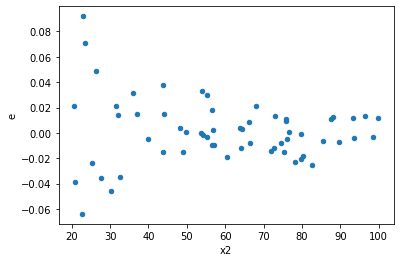

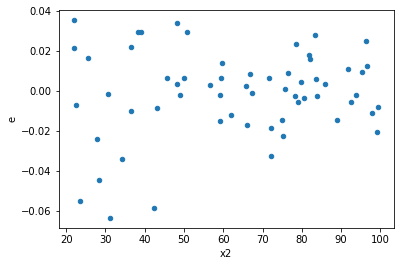

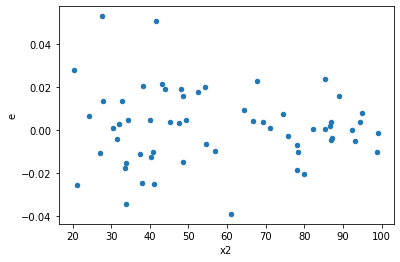

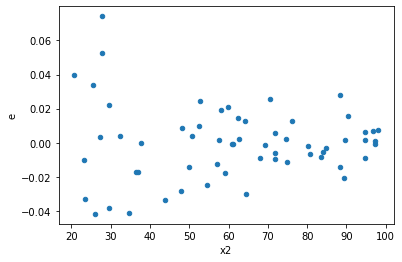

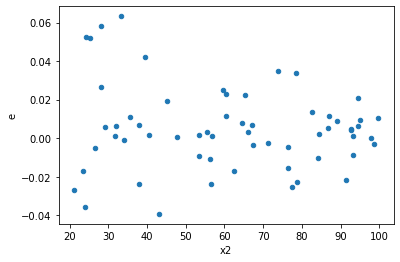

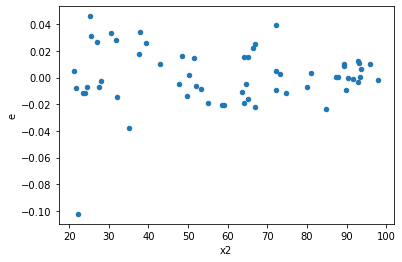

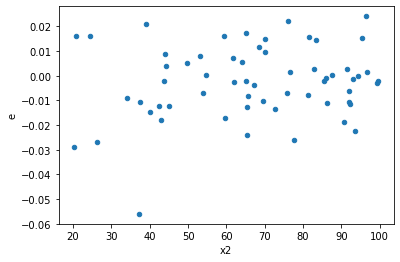

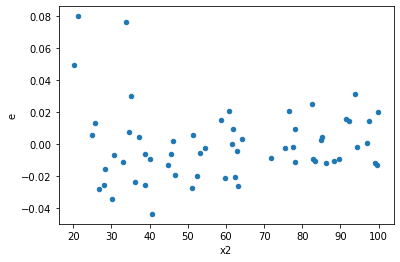

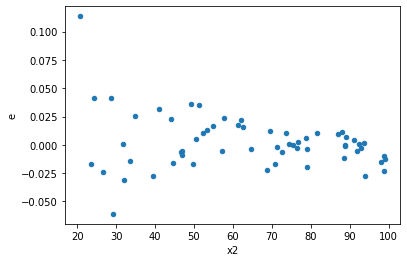

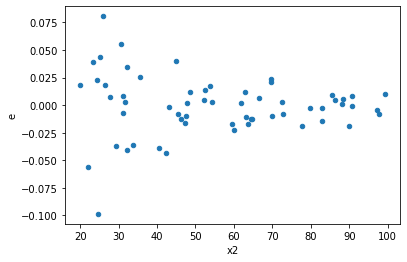

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
15.0,20.0,20.0,0.013784392131768505,0.015159360716419752,0.0006892196065884252,0.0007579680358209876,1.099748220415349,0.8337229496731835,0.5831385251634083,0.41686147483659175,Reject001=1 : Homoscedasticity
19.0,20.0,20.0,0.002949385585065321,0.003575326304459386,0.00014746927925326605,0.0001787663152229693,1.2122274966568,0.6710656868569416,0.6644671565715292,0.3355328434284708,Reject001=1 : Homoscedasticity
26.0,20.0,20.0,0.005286165472194383,0.008113718806305504,0.0002643082736097192,0.0004056859403152752,1.534896864084989,0.34586491446835677,0.8270675427658216,0.17293245723417838,Reject001=1 : Homoscedasticity
52.0,20.0,20.0,0.010434920780187573,0.013362003665579858,0.0005217460390093786,0.0006681001832789929,1.2805083955165082,0.5855234981860837,0.7072382509069581,0.29276174909304187,Reject001=1 : Homoscedasticity
63.0,20.0,20.0,0.005251273895400204,0.007513473670336864,0.00026256369477001024,0.0003756736835168432,1.4307906652742315,0.43011134853368604,0.784944325733157,0.21505567426684302,Reject001=1 : Homoscedasticity
64.0,20.0,20.0,0.006276762912226654,0.006803925219660107,0.0003138381456113327,0.00034019626098300536,1.0839863341670244,0.8586716131800589,0.5706641934099705,0.42933580659002946,Reject001=1 : Homoscedasticity
71.0,20.0,20.0,0.008504512942796607,0.01226405722673366,0.0004252256471398303,0.0006132028613366829,1.4420646201874991,0.4201305642422639,0.789934717878868,0.21006528212113196,Reject001=1 : Homoscedasticity
79.0,20.0,20.0,0.010040488124468847,0.013570099776830782,0.0005020244062234424,0.0006785049888415392,1.3515378543957648,0.5066899192325964,0.7466550403837018,0.2533449596162982,Reject001=1 : Homoscedasticity
91.0,20.0,20.0,0.010147598840928062,0.01349790120678732,0.0005073799420464031,0.000674895060339366,1.3301571552421412,0.5293670985884729,0.7353164507057636,0.26468354929423643,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,0.022054013366780582,0.006035753505204046,0.0011027006683390292,0.0003017876752602023,0.2736805045332725,0.005587639733137385,Reject001=0 : Heteroscedasticity
1.0,20.0,20.0,0.01465182348378736,0.0025556741511215493,0.000732591174189368,0.00012778370755607747,0.17442703660397438,0.0002635545524386556,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,0.007016844169625022,0.003290488586255741,0.0003508422084812511,0.00016452442931278705,0.46894137973019623,0.09829315786250012,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,0.009586079529841312,0.008882041182066609,0.00047930397649206564,0.00044410205910333045,0.9265561749635977,0.8662446149425242,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,0.00895963544847549,0.0054248959118233615,0.0004479817724237745,0.00027124479559116805,0.6054817679826945,0.2703239463523319,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,0.017799935735628825,0.003201042349956592,0.0008899967867814412,0.0001600521174978296,0.179834489152076,0.00032935120890252833,Reject001=0 : Heteroscedasticity
6.0,20.0,20.0,0.005857010499253239,0.0029372167324563715,0.0002928505249626619,0.00014686083662281856,0.5014873599476837,0.1311520032975895,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,0.006810621645779733,0.004470796580223214,0.00034053108228898664,0.0002235398290111607,0.6564447142638713,0.3543638865399084,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,0.023208567997516635,0.004759744391332096,0.0011604283998758317,0.0002379872195666048,0.2050856559457438,0.0008383735610718575,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      689
Reject001=0 : Heteroscedasticity    311
Name: Result_test, dtype: int64